In [12]:
import numpy as np
import pandas as pd
import scipy
import scipy.io

import sys, os, time
import glob

from matplotlib import pyplot as plt
%matplotlib inline

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
from skimage.transform import resize
from skimage.io import imsave

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

from IPython.display import clear_output

import copy as cp 

# these magics ensure that external modules that are modified are also automatically reloaded
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup data access 

In [2]:
data_path = '../../../data/es262-infrastructure-b-01/Afrobarometer_R6.csv'

In [3]:
data_mat = pd.read_csv(data_path)
# EA stands for Enumeration Areas

In [4]:
data_mat.columns

Index(['country', 'urbrur', 'region', 'locationlevel1', 'locationlevel2',
       'locationlevel3', 'locationlevel4', 'locationlevel5', 'townvill',
       'uniqueea', 'place_name', 'latitude', 'longitude', 'geoname_adm_name',
       'countryname', 'uniquegeocode', 'urban', 'multiplemode',
       'eaelectricity', 'eapipedwater', 'easewage', 'eacellphone',
       'eapostoffice', 'easchool', 'eapolicestation', 'eahealthclinic',
       'eamarketstalls', 'eabank', 'earoad', 'eateacherservices',
       'eamedicalservices', 'eahouseholdservices', 'eapoliceservices',
       'eadocumentservices', 'eacourtservices', 'eametalroof', 'eagrassroof',
       'eatileroof', 'eaformalhouse', 'eatraditionalhouse', 'eaflat',
       'eanofood', 'eanowater', 'eanomedicine', 'eanofuel', 'eanocash',
       'eaage', 'eaeducationlevel', 'ealivingconditions',
       'earelativelivingconditions', 'eaownradio', 'eaowntelevision',
       'eaownmotor', 'eaownmobilephone', 'year', 'id'],
      dtype='object')

In [15]:
# data_mat

country  urbrur  region            locationlevel1  \
0         Algeria     2.0    1424                     Jelfa   
1           Benin     1.0     105                  APLAHOUE   
2        Botswana     NaN     140                       NaN   
3     BurkinaFaso     2.0     180                     KOSSI   
4        Cameroon     1.0    1222                    DJEREM   
5     CotedIvoire     1.0    1260                   ABIDJAN   
6           Egypt     1.0    1460         Kecem of Helouane   
7           Gabon     2.0    1700                      KOMO   
8      Madagascar     1.0     422  Antananarivo Renivohitra   
9            Mali     2.0     501           CERCLE DE KAYES   
10        Morocco     1.0    1507                   Driouch   
11     Mozambique     1.0     549                       IBO   
12          Niger     2.0    1100              TCHIROZERINE   
13        Nigeria     1.0     620                 ABA SOUTH   
14        Senegal     1.0     660                     DAKAR   
15        Tunisia     1.0    1580               Bab El Bhar   
16        Algeria     2.0    1424                     Jelfa   
17          Benin     1.0     105                DJAKOTOMEY   
18       Botswana     2.0     140                       NaN   
19    BurkinaFaso     2.0     180                     KOSSI   
20       Cameroon     1.0    1222                     MBERE   
21    CotedIvoire     1.0    1260                   ABIDJAN   
22          Egypt     1.0    1460            Kecem Al Maadi   
23          Gabon     2.0    1700                      KOMO   
24     Madagascar     1.0     422  ANTANANARIVO RENIVOHITRA   
25           Mali     2.0     501           CERCLE DE KAYES   
26        Morocco     1.0    1510                      Safi   
27     Mozambique     1.0     549         MOCIMBOA DA PRAIA   
28          Niger     2.0    1100              TCHIROZERINE   
29        Nigeria     1.0     620                    OHAFIA   
...           ...     ...     ...                       ...   
6992       Zambia     2.0     825                   luwingu   
6993       Zambia     2.0     825                   luwingu   
6994       Zambia     2.0     825                     mbala   
6995       Zambia     1.0     825                  mpulungu   
6996       Zambia     2.0     825                    mungwi   
6997       Zambia     2.0     825                    mungwi   
6998       Zambia     2.0     826                   kabompo   
6999       Zambia     2.0     826                   kasempa   
7000       Zambia     1.0     826                  mufumbwe   
7001       Zambia     1.0     826                   solwezi   
7002       Zambia     2.0     826                   solwezi   
7003       Zambia     1.0     827                     choma   
7004       Zambia     2.0     827                     pemba   
7005       Zambia     2.0     827                    kalomo   
7006       Zambia     2.0     827                 kazungula   
7007       Zambia     2.0     827                 kazungula   
7008       Zambia     1.0     827               livingstone   
7009       Zambia     1.0     827               livingstone   
7010       Zambia     2.0     827                    magoye   
7011       Zambia     2.0     827                    magoye   
7012       Zambia     1.0     827                  mazabuka   
7013       Zambia     1.0     827                     monze   
7014       Zambia     2.0     827                   namwala   
7015       Zambia     2.0     827                sinazongwe   
7016       Zambia     2.0     828                    kalabo   
7017       Zambia     1.0     828                     kaoma   
7018       Zambia     2.0     828                     kaoma   
7019       Zambia     1.0     828                     mongu   
7020       Zambia     2.0     828                     mongu   
7021       Zambia     2.0     828                   sesheke   

         locationlevel2             locationlevel3 locationlevel4  \
0                   NaN           

In [25]:
# data mat 
# ["Morocco", "Burundi"]
data_country = data_mat[((data_mat["country"] == "Burundi") & (data_mat["year"] == 2014))]
country_ea_lat_lng = data_country.loc[:, ["latitude", "longitude", "id"]]
country_ea_lat_lng.iloc[1,:].values

array([ -3.02390000e+00,   2.93703000e+01,   3.15800000e+03])

In [5]:
def selectea(x):
    if x.startswith("ea"):
        return(x)
    else:
        return(None)

    
ea_col_name = [selectea(x) for x in data_mat.columns]    
ea_col_name = [x for x in ea_col_name if x is not None] #filter(lambda k: k is not None, ea_col_name) 

eaelectricity
eapipedwater
easewage
eacellphone
eapostoffice
easchool
eapolicestation
eahealthclinic
eamarketstalls
eabank
earoad
eateacherservices
eamedicalservices
eahouseholdservices
eapoliceservices
eadocumentservices
eacourtservices
eametalroof
eagrassroof
eatileroof
eaformalhouse
eatraditionalhouse
eaflat
eanofood
eanowater
eanomedicine
eanofuel
eanocash
eaage
eaeducationlevel
ealivingconditions
earelativelivingconditions
eaownradio
eaowntelevision
eaownmotor
eaownmobilephone


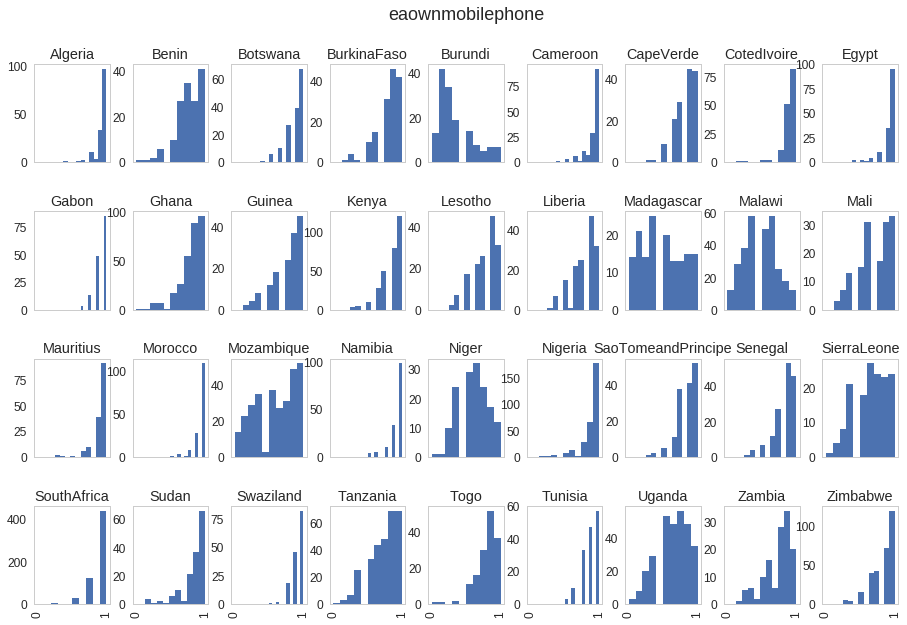

In [18]:
for i in ea_col_name:
    print(i)
    fig, ax = plt.subplots() 
    ax.set_title(i, fontsize=18)
    ########################
    # @important to drop nan 
    response_array=(data_mat[i].dropna().values)
 
    weights = np.ones_like(response_array)/float(len(response_array)) 
    #     plt.hist(myarray, weights=weights)
    fig1 = ax.hist(response_array, bins=4, weights=weights)   # groupby(["country"])
    plt.tick_params(labelsize=16)
    path_dir = "../img/response_data_img/%s" % i 
    if os.path.exists(path_dir) is False:
        os.mkdir(path_dir)
    plt.tight_layout()    
    fig.savefig("../img/response_data_img/%s/overall_%s_hist.eps"%(i,i))
    plt.close('all')
    # 
    #############################
    # check individual countries 
    fig_coutr, axes = plt.subplots(nrows=4, ncols=9, sharex=True, sharey=False,figsize=(15,10))
    sns.set(font_scale=1.2)
    sns.set_style("whitegrid", {'axes.grid' : False})
    fig2 = (data_mat[["country", i]].dropna()).hist(by="country", figsize=(15,10), ax=axes)
    plt.suptitle(i, size=18)
    plt.tick_params(labelsize=12)
    fig_coutr.savefig("../img/response_data_img/%s/indi_countries_%s_hist.eps"%(i,i), width=15, height=10)
#     break
    

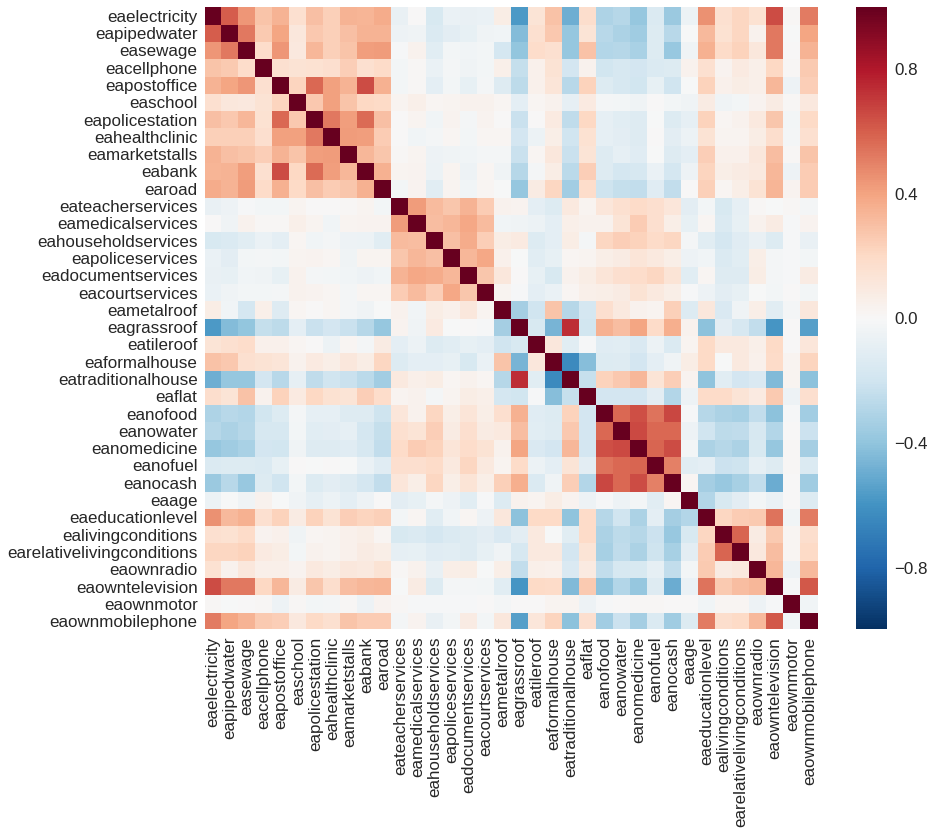

In [20]:
# # check correlation between response variable 
corr_mat = data_mat[ea_col_name].dropna().corr()
sns.set(font_scale=1.7)
sns.set_style("whitegrid")
plt.figure(figsize=(14, 12))
g = sns.heatmap(corr_mat, xticklabels=corr_mat.columns.values, yticklabels=corr_mat.columns.values, annot_kws={"size": 19})
plt.tight_layout()
plt.savefig("../img/response_data_img/overall_corr.eps")
# # 




[  8.06691300e-01   5.12299007e-02   2.48330038e-02   1.63114247e-02
   1.02676634e-02   9.18794508e-03   7.60890611e-03   7.34185507e-03
   6.99618684e-03   6.11999820e-03   5.54383612e-03   4.73070022e-03
   4.13360767e-03   3.85692006e-03   3.64148894e-03   3.44535742e-03
   3.02693679e-03   2.93534715e-03   2.57663850e-03   2.39569750e-03
   2.20253267e-03   2.08827811e-03   1.90447390e-03   1.85103729e-03
   1.52186603e-03   1.35876949e-03   1.32961173e-03   1.07925275e-03
   1.01989889e-03   9.52356926e-04   5.97403100e-04   4.11205285e-04
   3.79202211e-04   2.57257647e-04   1.67466266e-04]


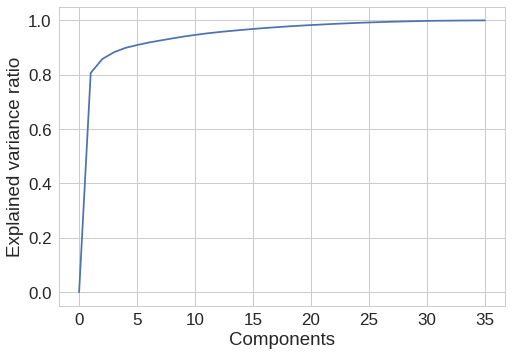

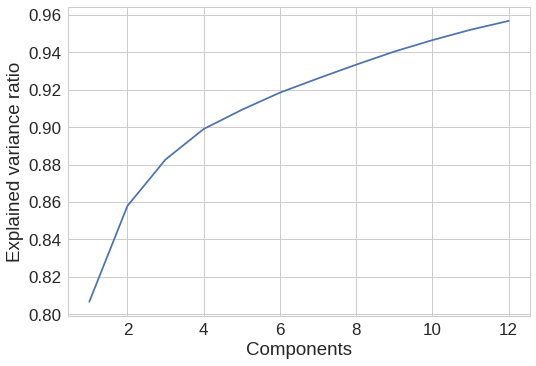

In [37]:
from sklearn.decomposition import PCA
X = data_mat[ea_col_name].dropna()
pca = PCA(n_components=35)
pca.fit(X)
print(pca.explained_variance_ratio_)
plt.plot(np.arange(0,36), np.insert(np.cumsum(pca.explained_variance_ratio_), 0, 0) )
plt.xlabel("Components")
plt.ylabel("Explained variance ratio")
plt.show()
plt.close('all')
fig, ax= plt.subplots()
ax.plot(np.arange(1, 13), np.cumsum(pca.explained_variance_ratio_)[:12])
plt.xlabel("Components")
plt.ylabel("Explained variance ratio")

plt.tight_layout()
plt.savefig("../img/response_data_img/all_var_pca.eps")
plt.show()

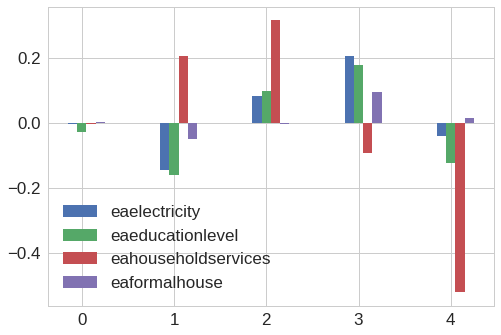

In [69]:
################
# 
################
nc=5
pca = PCA(n_components=nc)
X_r = pca.fit(X).transform(X)
loadings = pca.components_

plt.bar(np.arange(nc) - 0.1, loadings[:nc, 0], width=0.1, label=ea_col_name[0])
plt.bar(np.arange(nc) - 0.0, loadings[:nc, 29], width=0.1, label=ea_col_name[29])
plt.bar(np.arange(nc) + 0.1, loadings[:nc, 13], width=0.1, label=ea_col_name[13])
plt.bar(np.arange(nc) + 0.2, loadings[:nc, 20], width=0.1, label=ea_col_name[20])
plt.legend()

Algeria
shape 34, 34
Benin
shape 35, 35
Botswana
shape 35, 35
BurkinaFaso
shape 32, 32
Cameroon
shape 33, 33
CotedIvoire
shape 33, 33
Egypt
shape 33, 33
Gabon
shape 33, 33
Madagascar
shape 34, 34
Mali
shape 34, 34
Morocco
shape 35, 35
Mozambique
shape 35, 35
Niger
shape 33, 33
Nigeria
shape 35, 35
Senegal
shape 34, 34
Tunisia
shape 33, 33
Uganda
shape 35, 35
Sudan
shape 35, 35
Liberia
shape 36, 36
Swaziland
shape 34, 34
Togo


/home/xchen/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


shape 33, 33
Burundi
shape 34, 34
CapeVerde
shape 36, 36
Mauritius
shape 28, 28
Guinea
shape 33, 33
SaoTomeandPrincipe
shape 33, 33
Lesotho
shape 35, 35
Malawi
shape 34, 34
Namibia
shape 35, 35
SierraLeone
shape 35, 35
SouthAfrica
shape 35, 35
Ghana
shape 36, 36
Zimbabwe
shape 35, 35
Tanzania
shape 35, 35
Kenya
shape 36, 36
Zambia
shape 36, 36


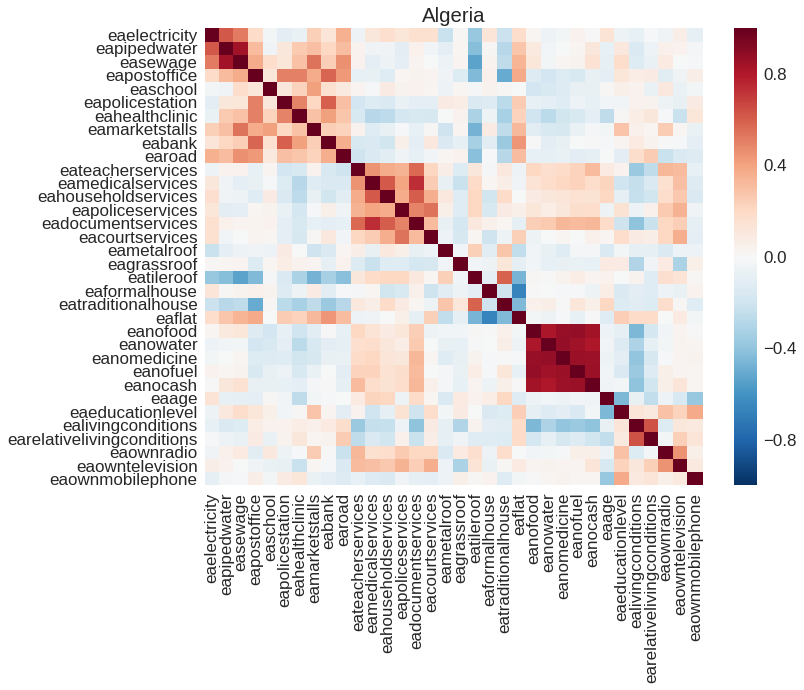

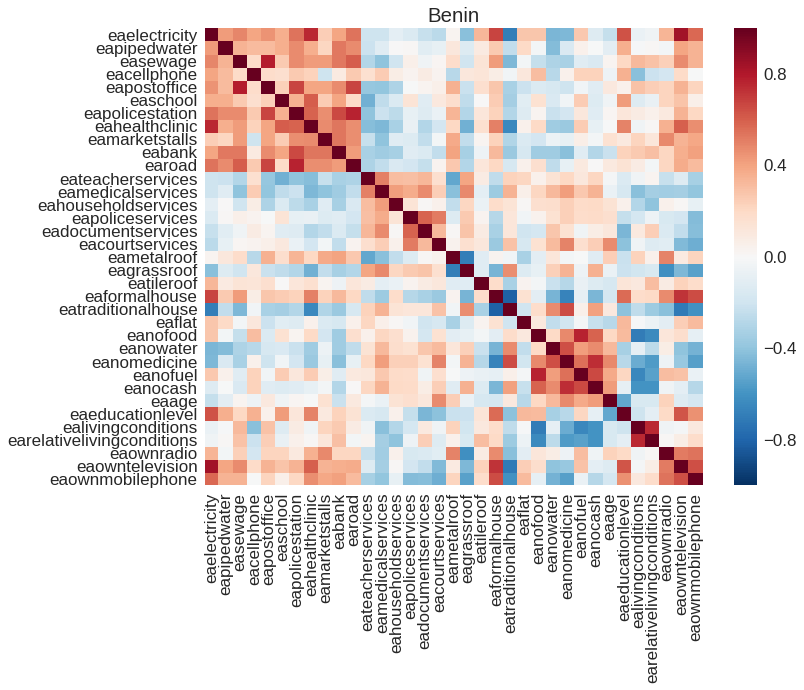

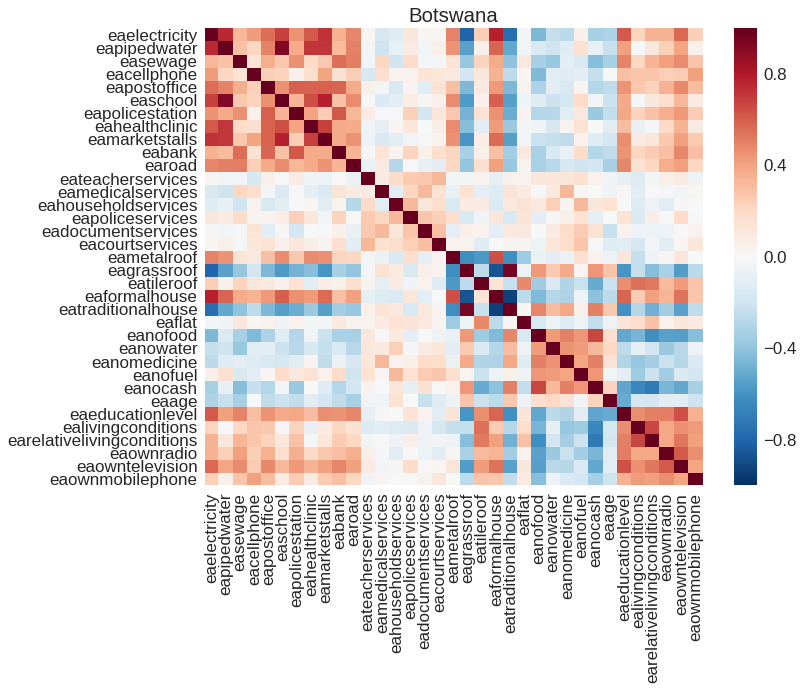

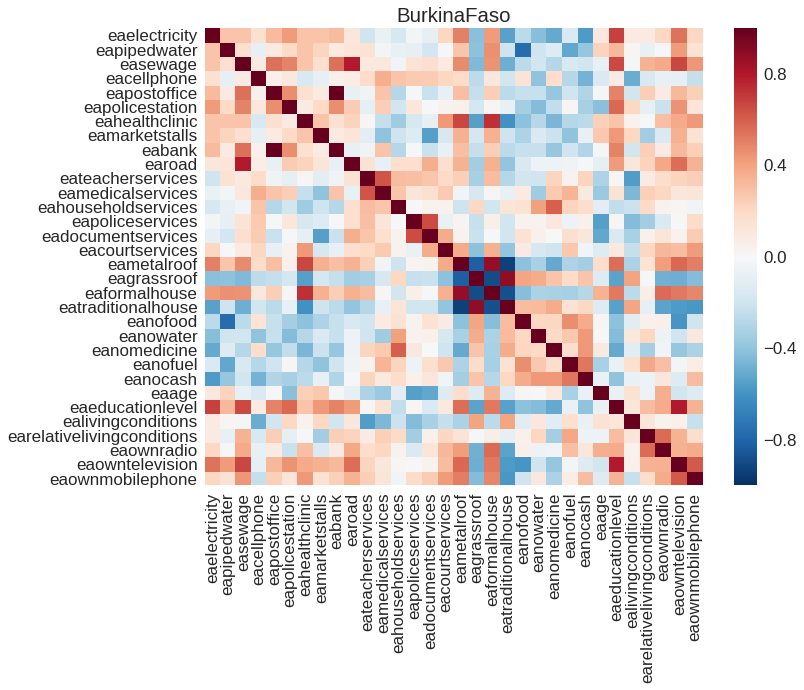

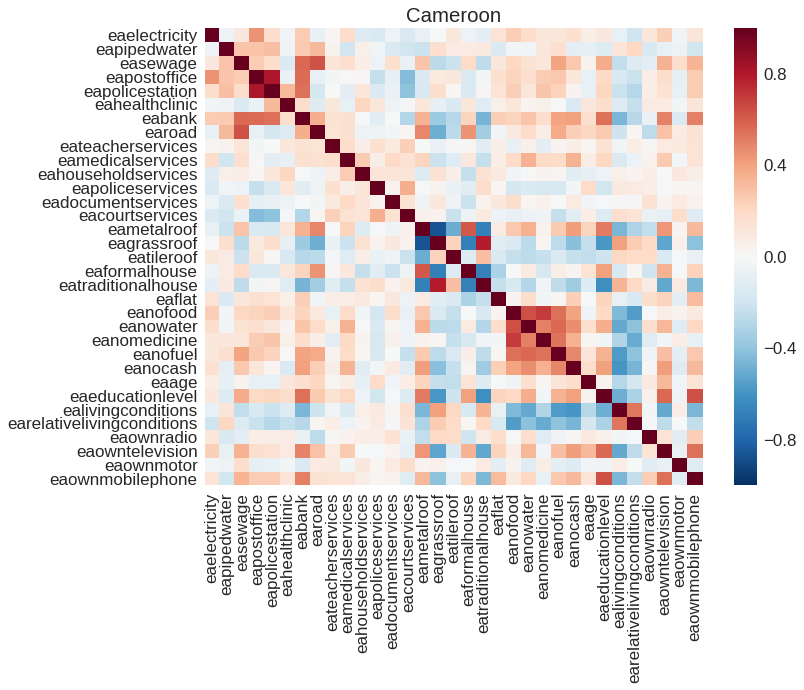

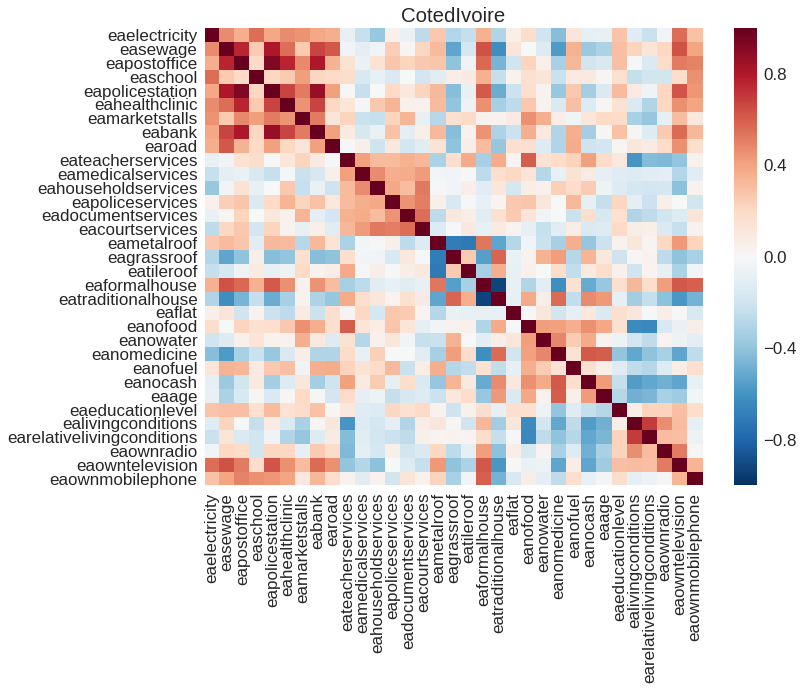

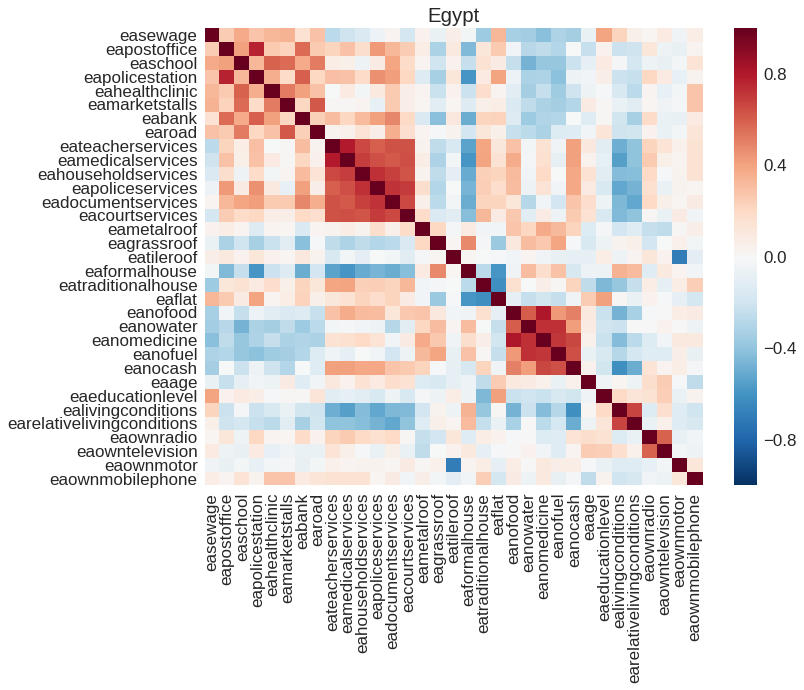

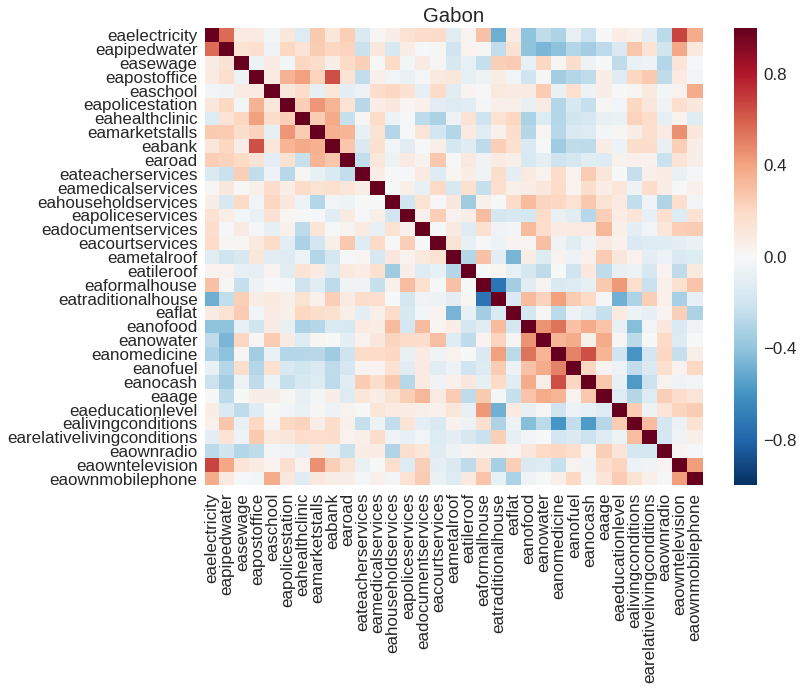

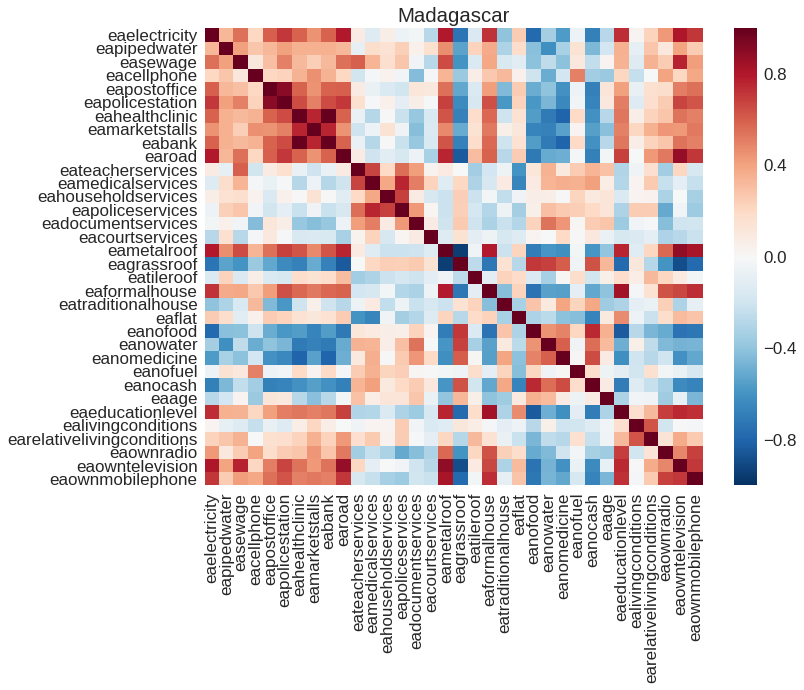

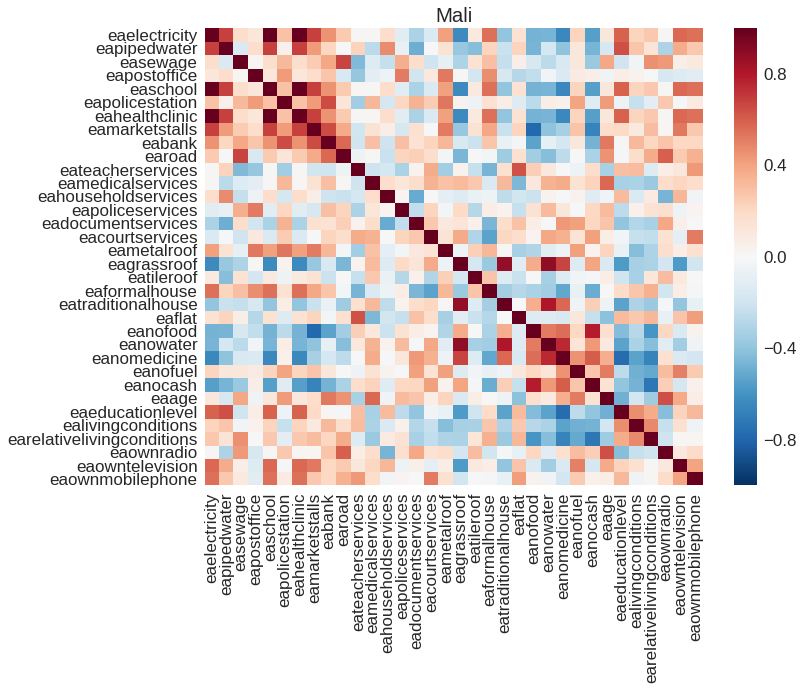

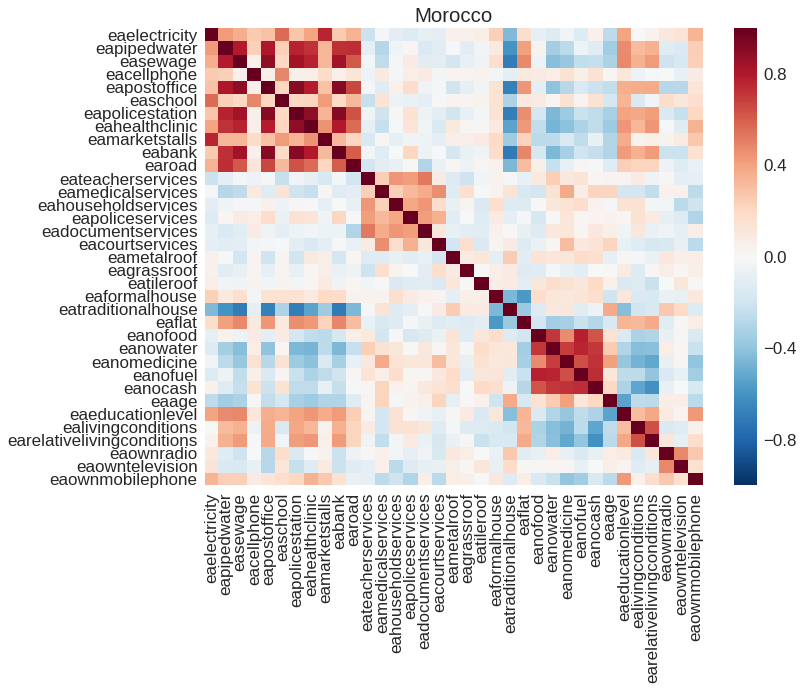

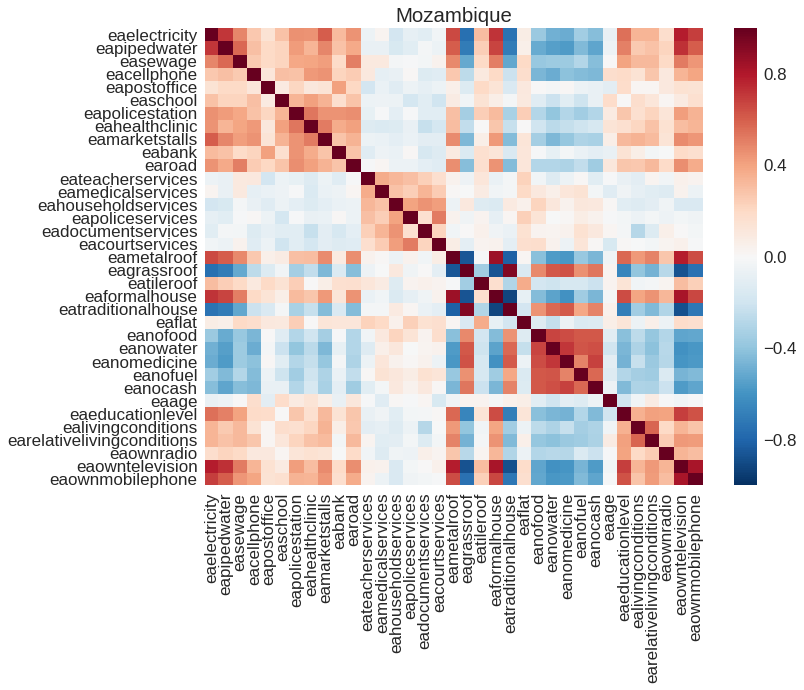

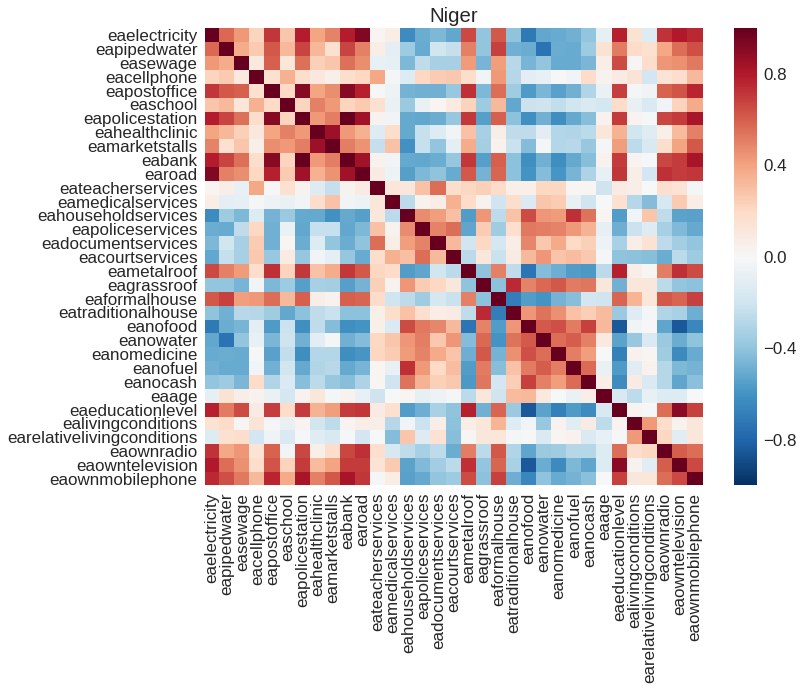

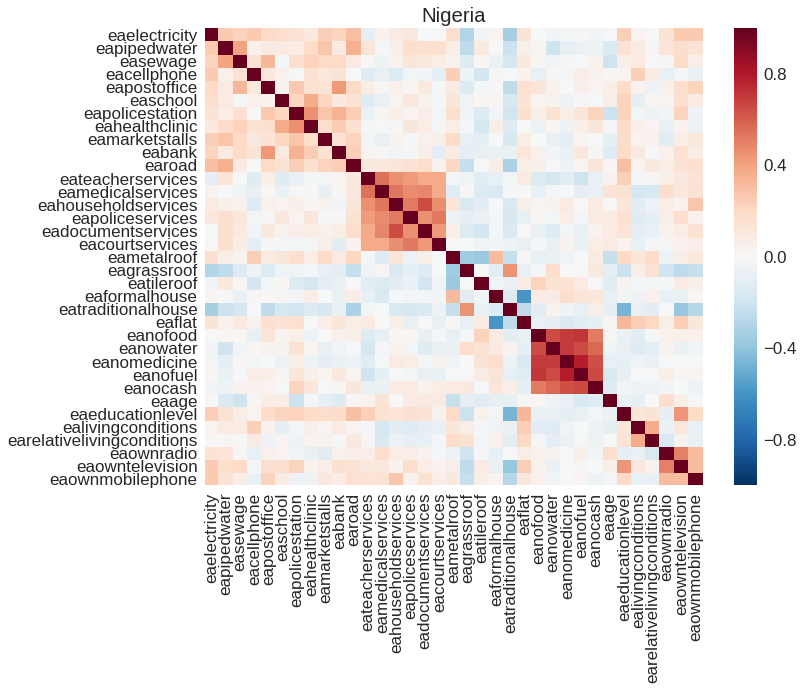

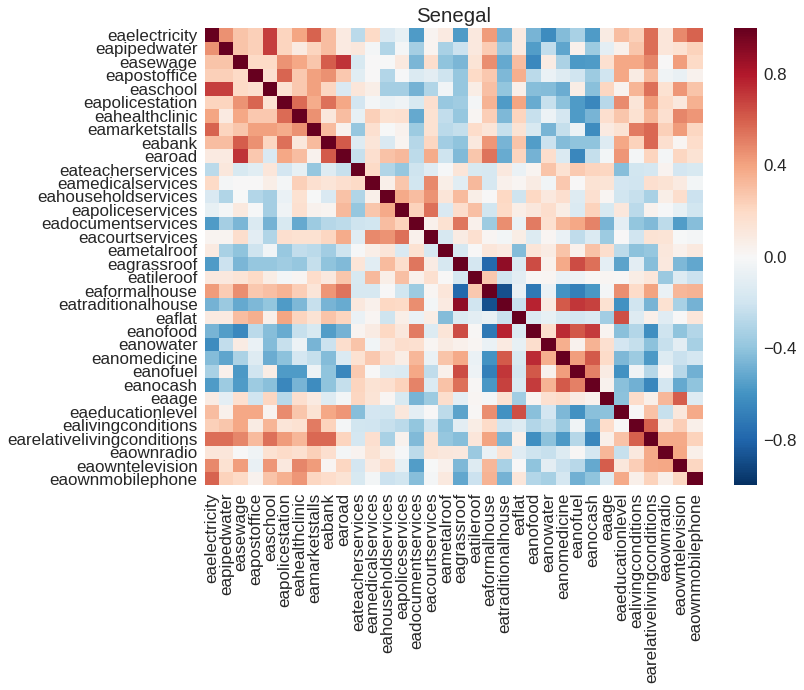

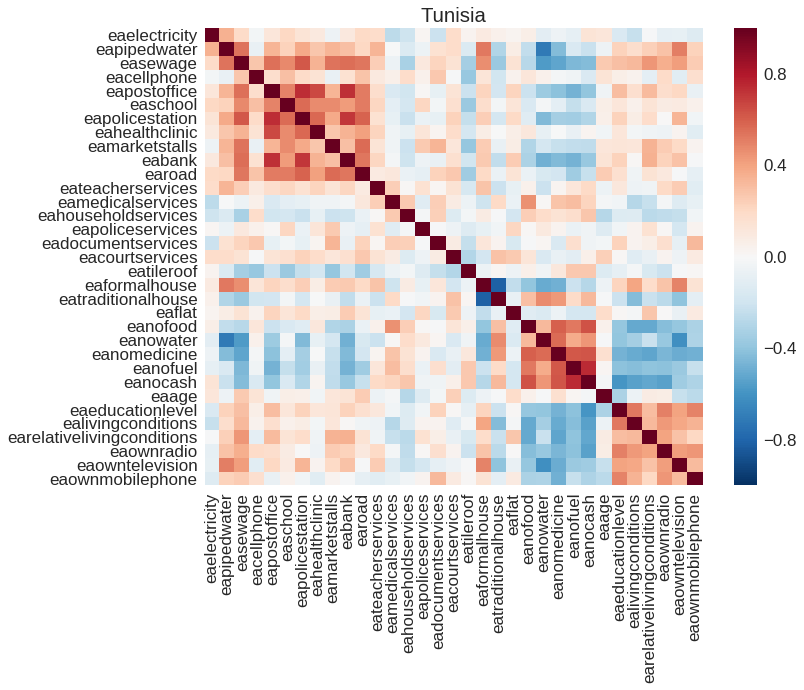

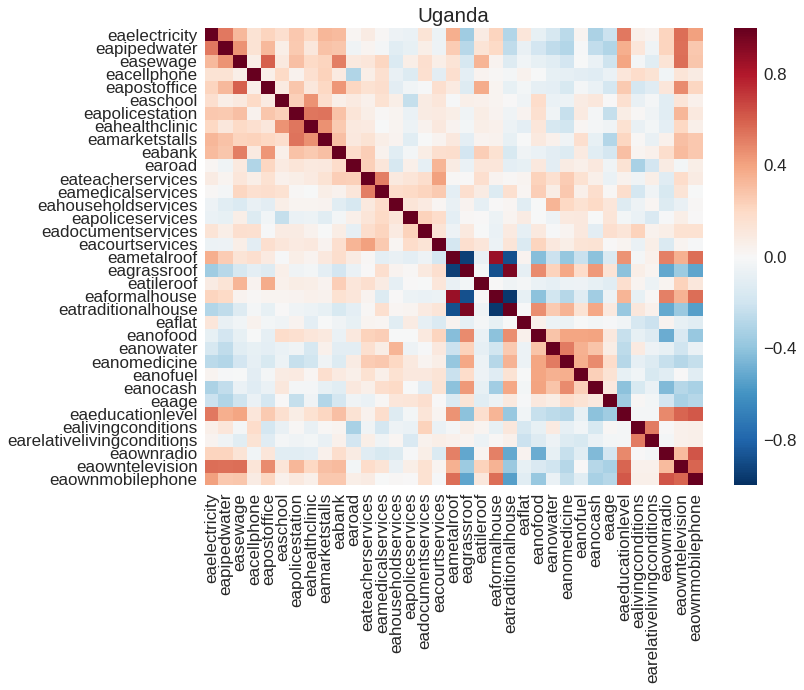

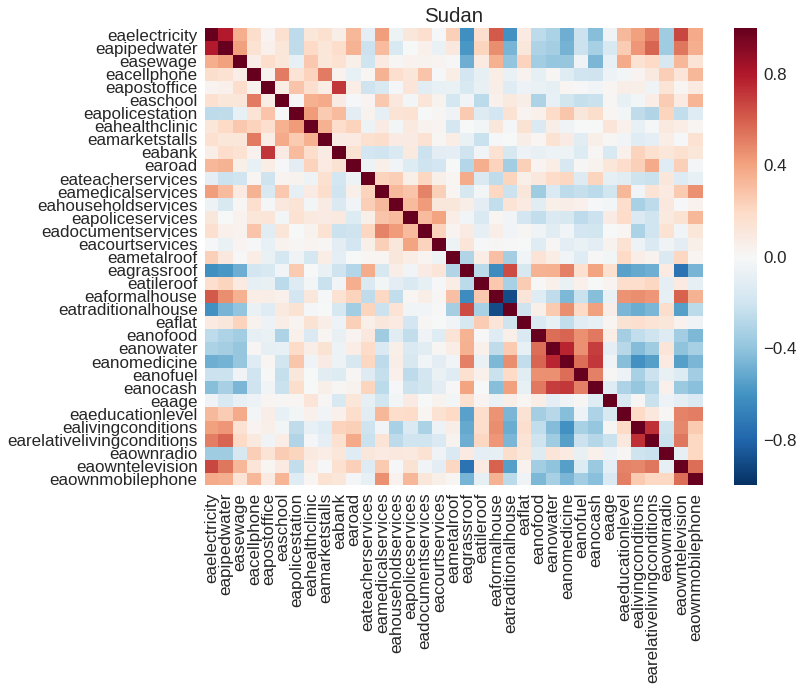

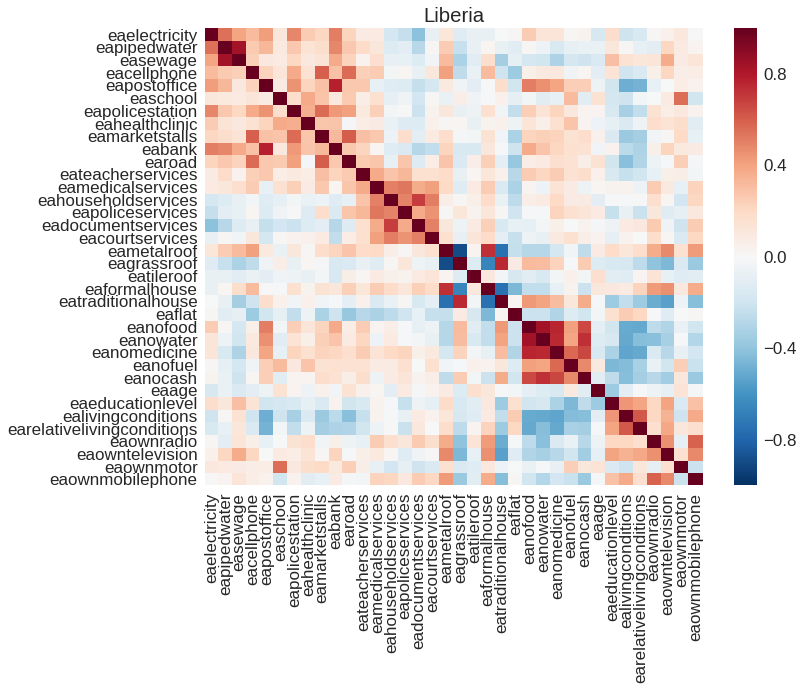

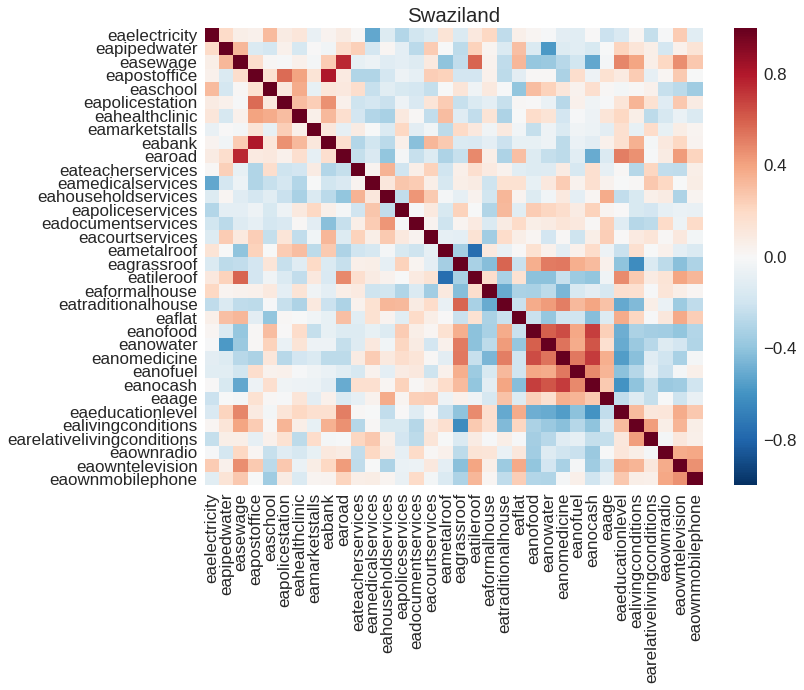

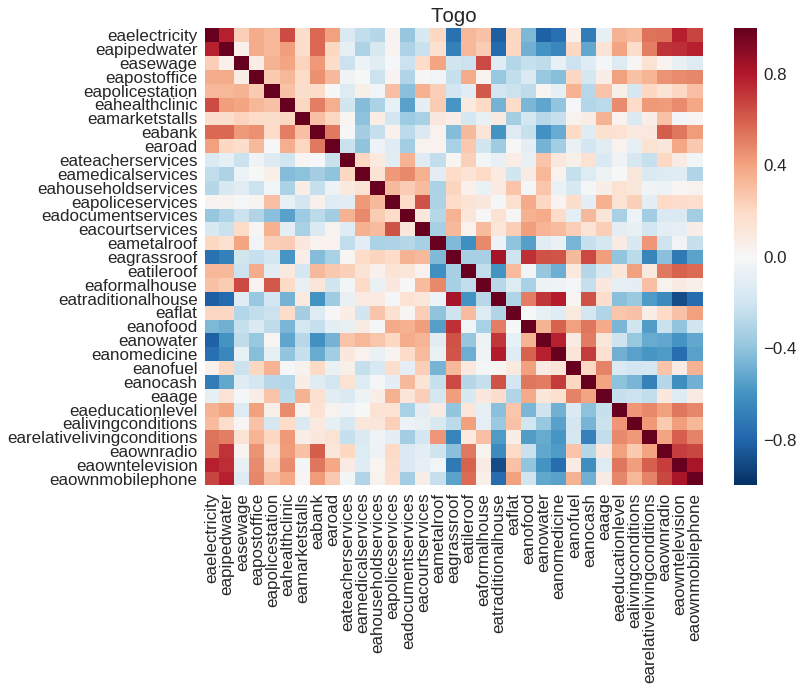

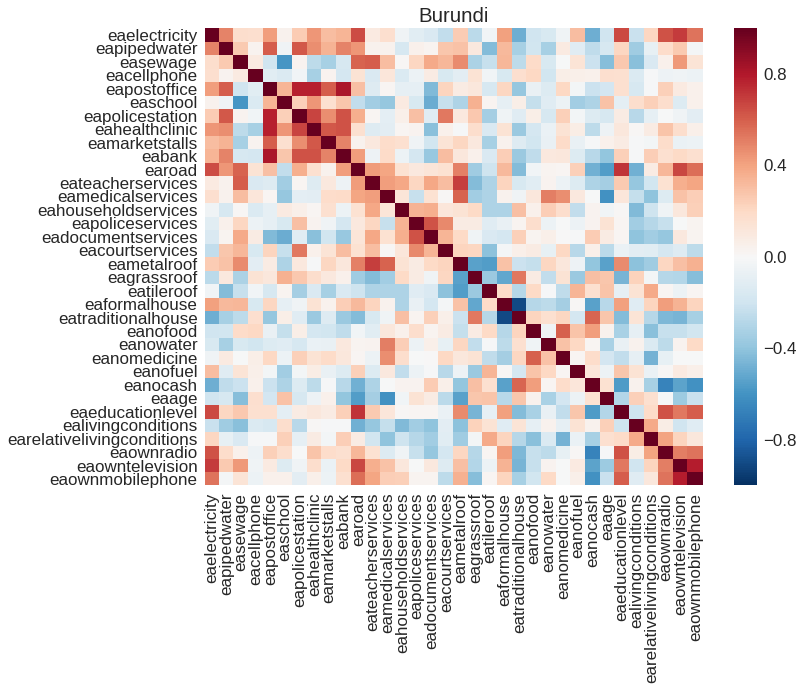

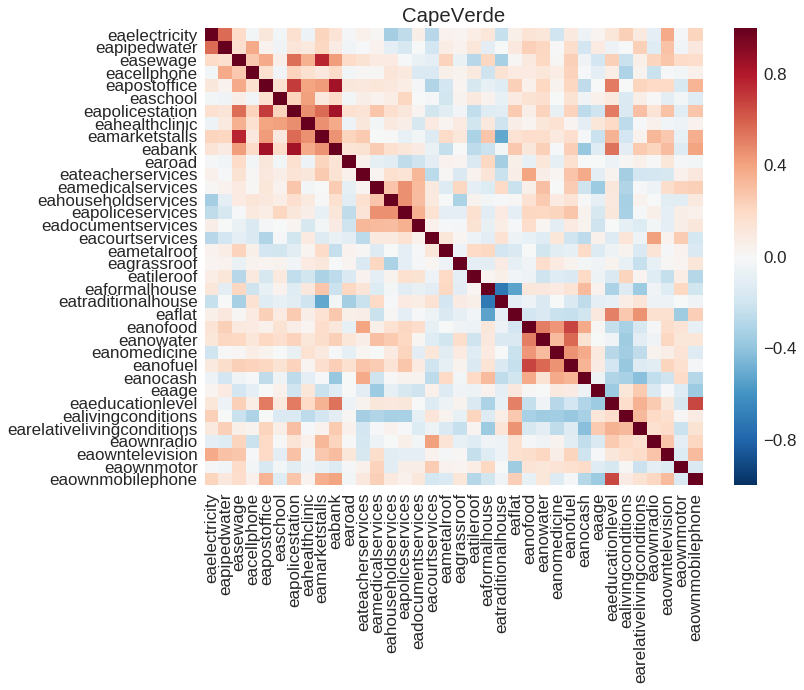

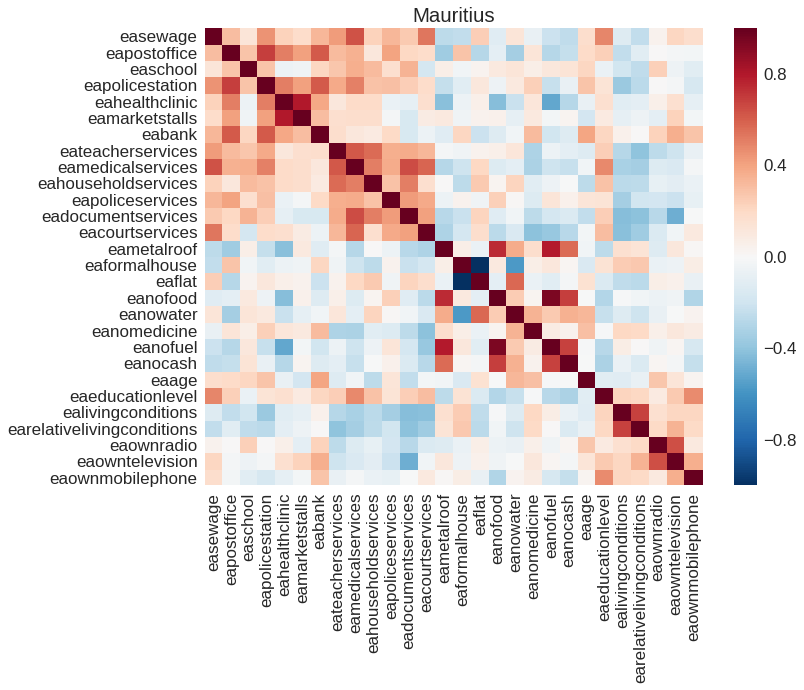

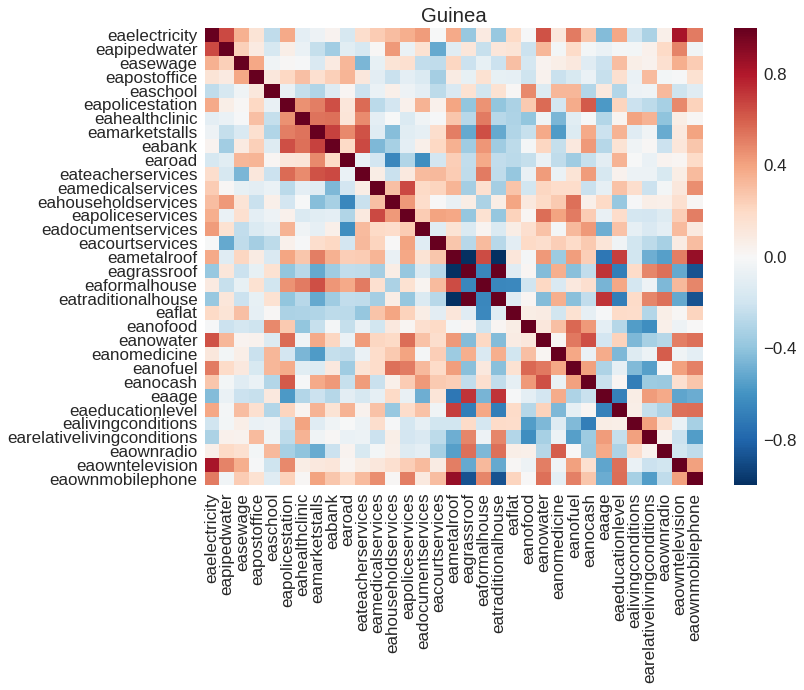

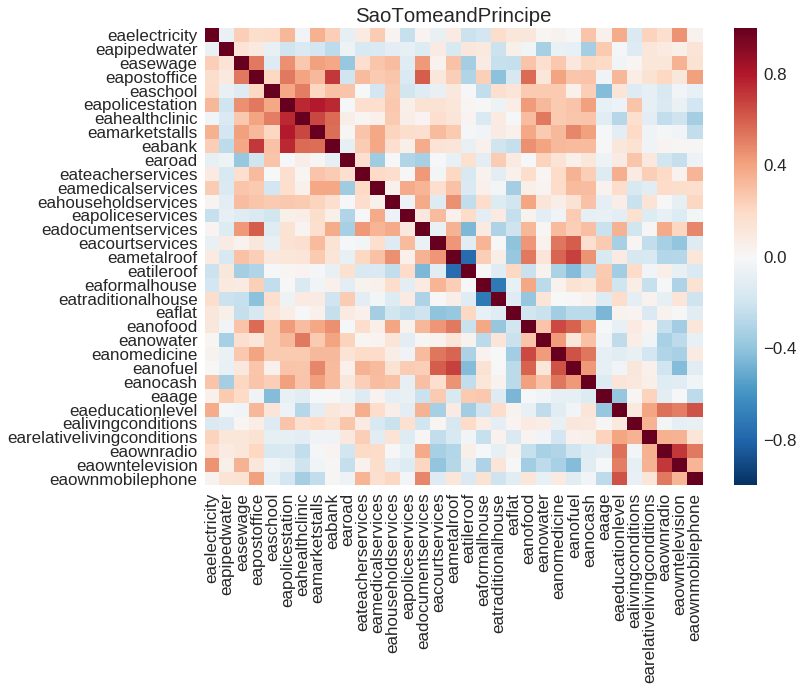

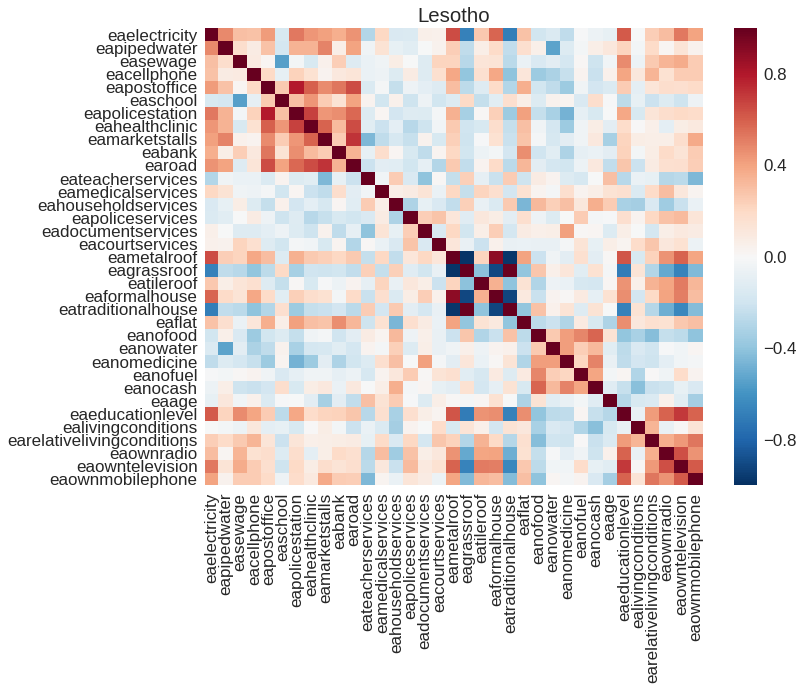

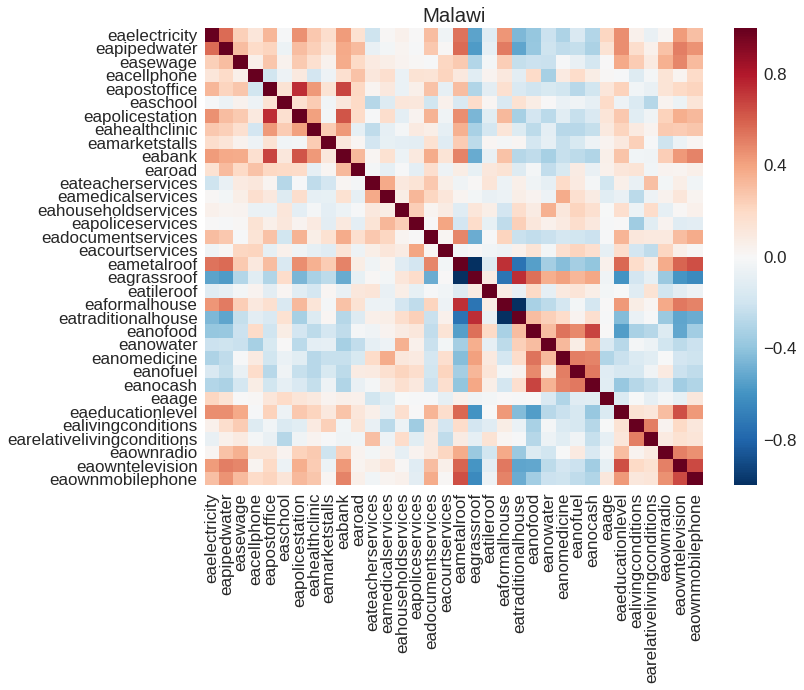

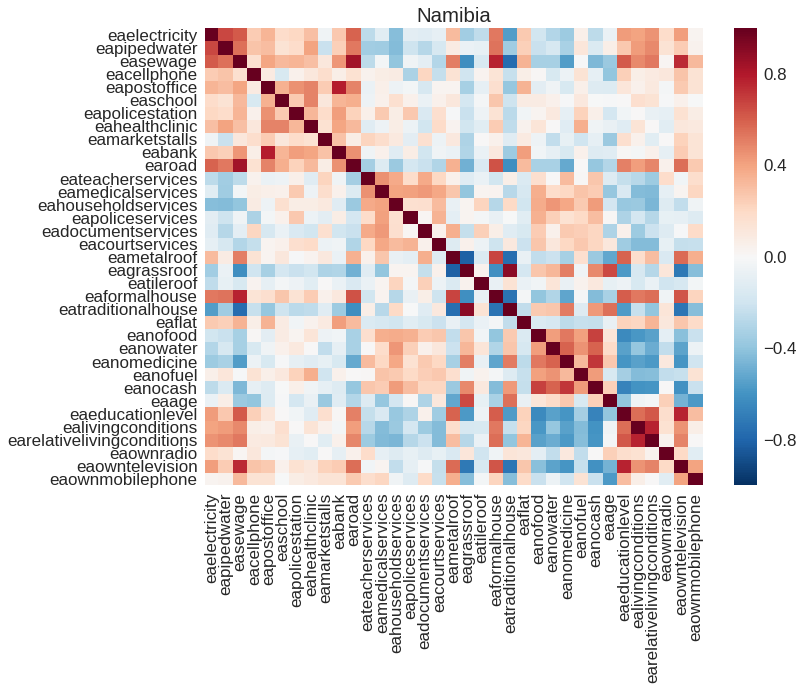

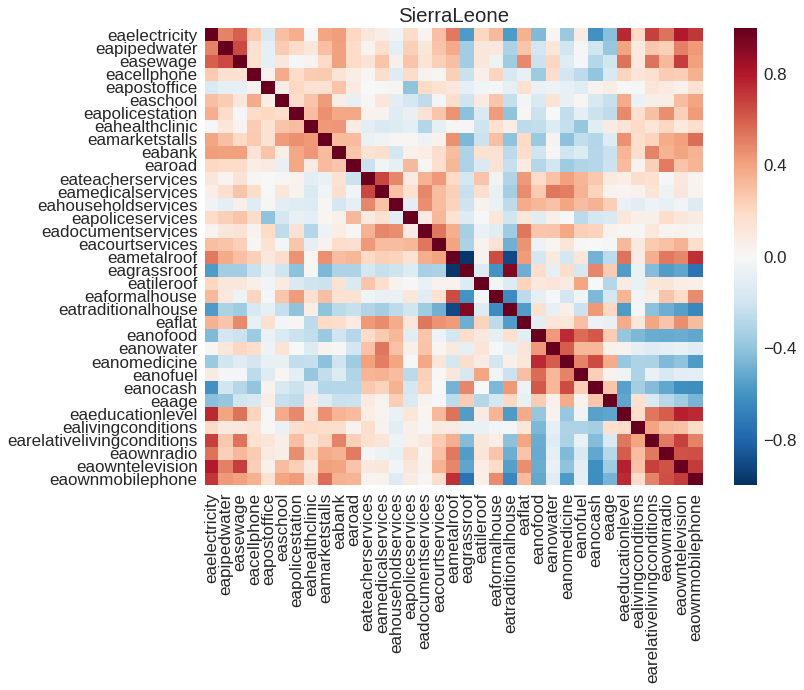

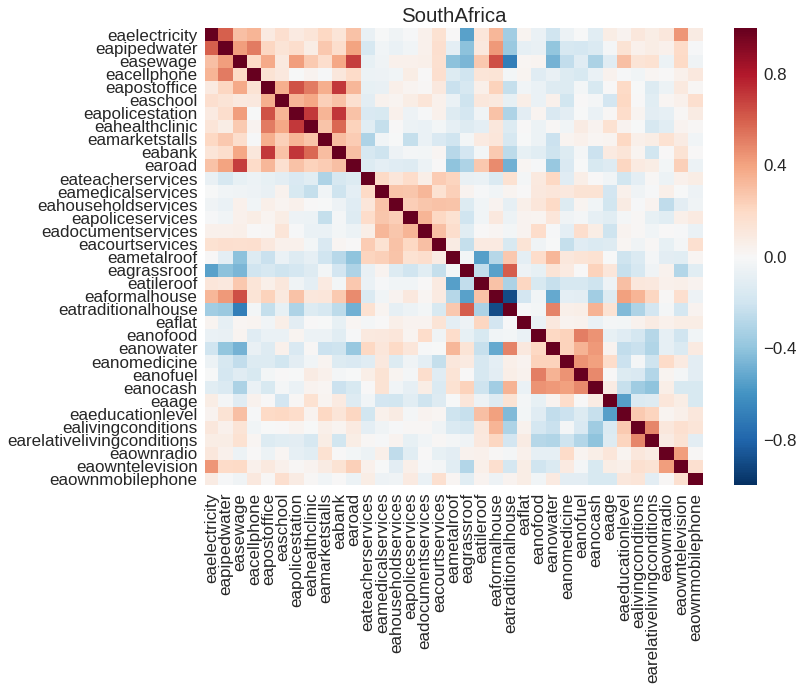

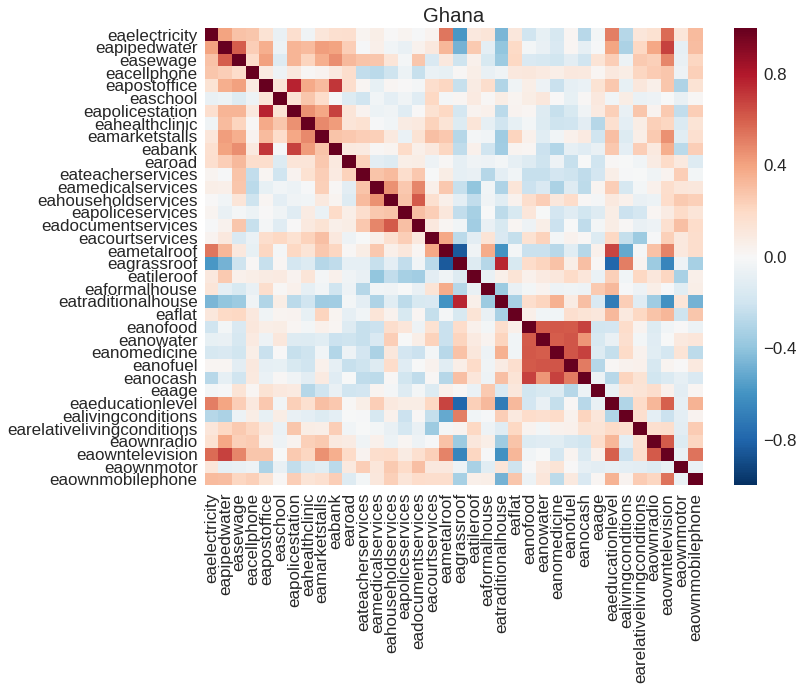

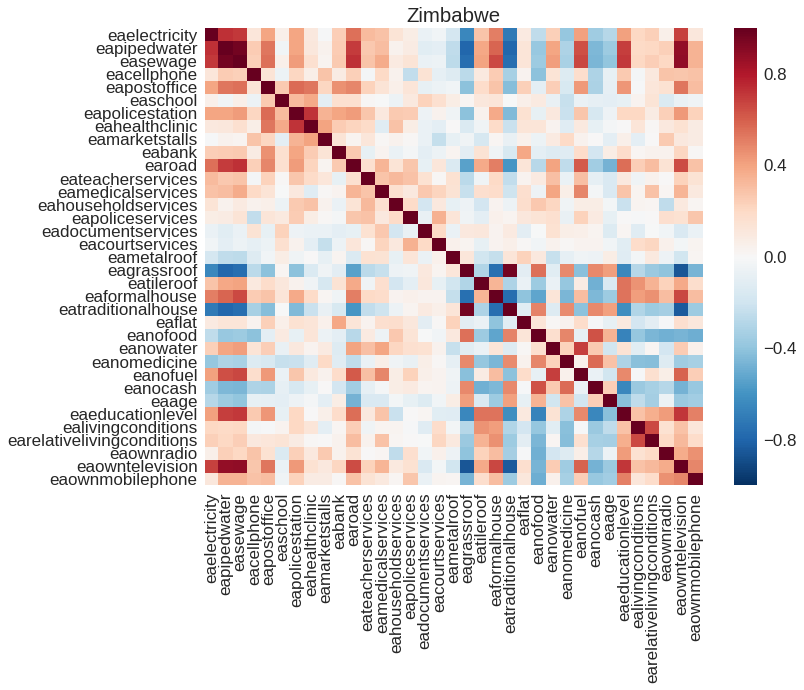

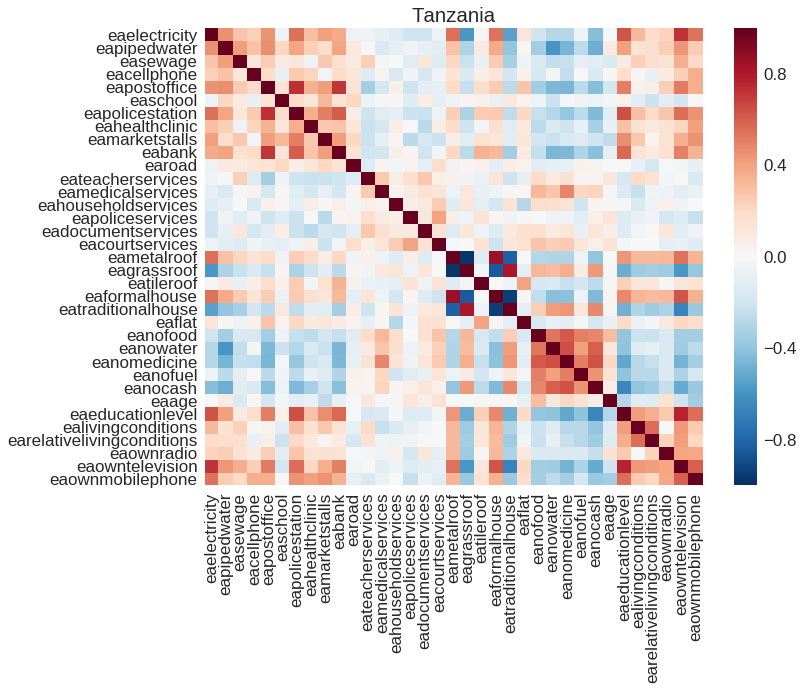

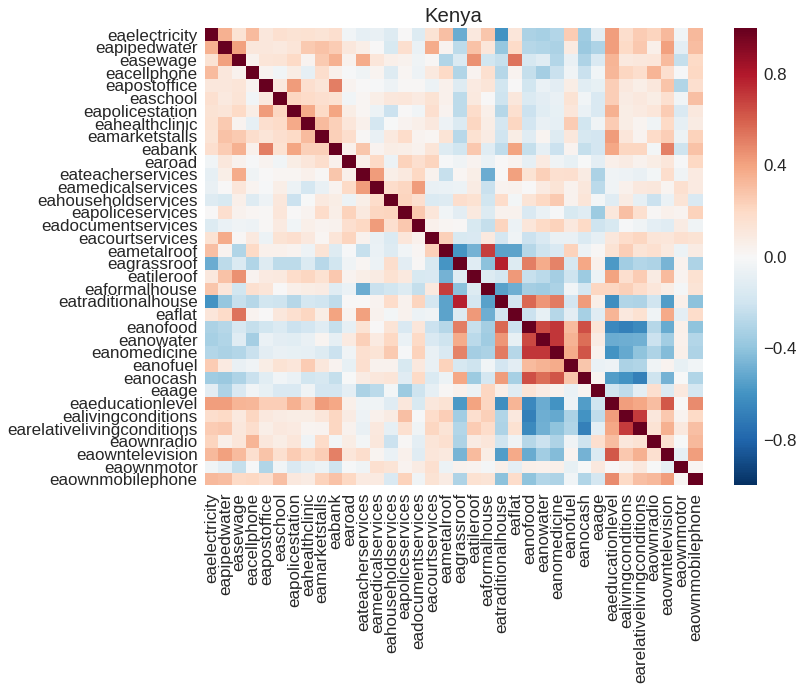

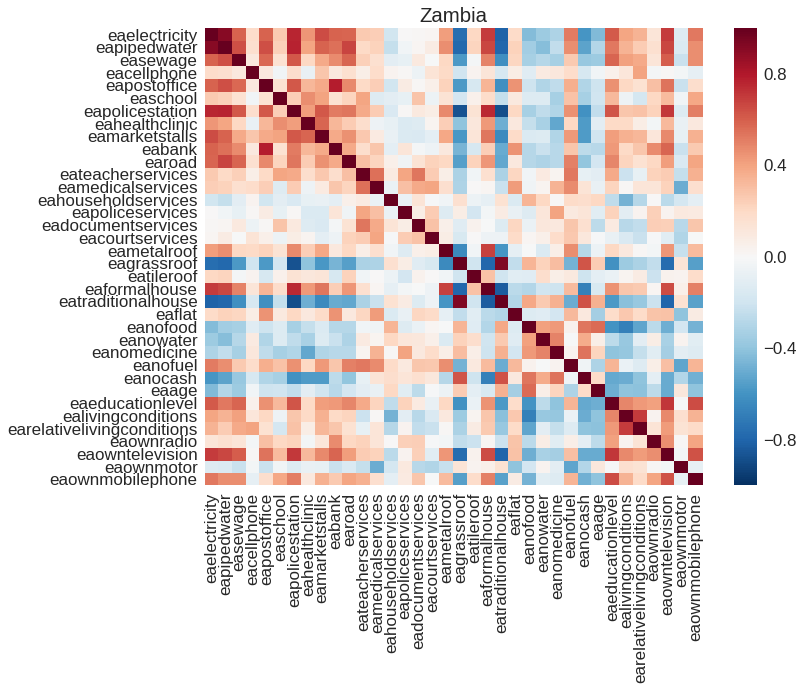

In [10]:

for c in data_mat["country"].unique() : 
    print(c)
    df_=(data_mat.loc[lambda df: df.country == c, ea_col_name]).dropna(how='any')
    #.corr(method='kendall'))
    df_ = df_.loc[:, (df_ != 0).any(axis=0)]
    df = df_.loc[:, (df_ != 1).any(axis=0)]
    plt.figure(figsize=(12,10))
    g=sns.heatmap(df.corr())
#     display(g)
    plt.title(c)
    print("shape %d, %d" %(df.shape[1], df.corr().shape[0]))
    path_dir = "../img/response_data_img/country"
    if os.path.exists(path_dir) is False:
        os.mkdir(path_dir)
    plt.tight_layout()    
    plt.savefig("../img/response_data_img/country/indi_countries_%s_corr.eps"%(c), height=16, width=17)
    plt.close('all')
#     break

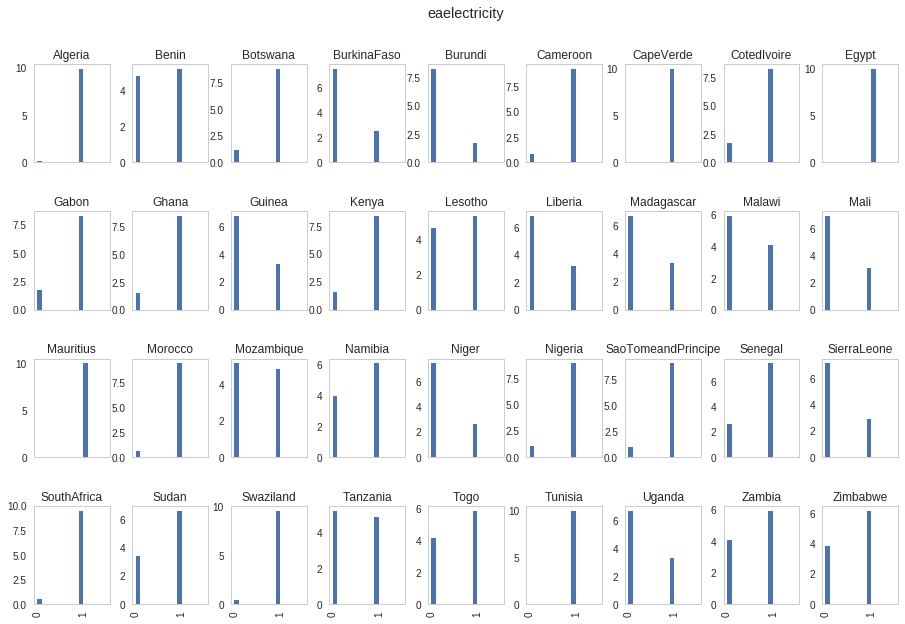

In [28]:
# num_countries = data_mat.groupby(["country"]).count().shape[0]
fig, axes = plt.subplots(nrows=4, ncols=9, sharex=True, sharey=False,figsize=(15,10))
data_mat[["country", "eaelectricity"]].hist(by="country", figsize=(15,10), ax=axes, normed)
plt.suptitle("eaelectricity")



In [35]:
# g = sns.FacetGrid(data_mat[["country", "eaelectricity"]], row="country", col="eaelectricity", margin_titles=True)
# g.map(plt.hist, "country", color="steelblue", lw=0, normed=1)

In [71]:
data_mat.columns

Index(['country', 'urbrur', 'region', 'locationlevel1', 'locationlevel2',
       'locationlevel3', 'locationlevel4', 'locationlevel5', 'townvill',
       'uniqueea', 'place_name', 'latitude', 'longitude', 'geoname_adm_name',
       'countryname', 'uniquegeocode', 'urban', 'multiplemode',
       'eaelectricity', 'eapipedwater', 'easewage', 'eacellphone',
       'eapostoffice', 'easchool', 'eapolicestation', 'eahealthclinic',
       'eamarketstalls', 'eabank', 'earoad', 'eateacherservices',
       'eamedicalservices', 'eahouseholdservices', 'eapoliceservices',
       'eadocumentservices', 'eacourtservices', 'eametalroof', 'eagrassroof',
       'eatileroof', 'eaformalhouse', 'eatraditionalhouse', 'eaflat',
       'eanofood', 'eanowater', 'eanomedicine', 'eanofuel', 'eanocash',
       'eaage', 'eaeducationlevel', 'ealivingconditions',
       'earelativelivingconditions', 'eaownradio', 'eaowntelevision',
       'eaownmotor', 'eaownmobilephone', 'year', 'id'],
      dtype='object')

In [68]:
data_mat_fill = data_mat[ea_col_name].copy()
# data_mat_fill = data_mat_fill.fillna(-1)

In [69]:
# data_mat_fill["id"] = data_mat["id"]

In [70]:
sub_data_mat=data_mat_fill[['eaelectricity', 'eapipedwater', 'easewage', 'eacellphone',
       'eapostoffice', 'easchool', 'eapolicestation', 'eahealthclinic',
       'eamarketstalls', 'eabank', 'earoad']].fillna(0)

data_mat_fill = pd.concat([sub_data_mat, data_mat_fill[['eateacherservices',
       'eamedicalservices', 'eahouseholdservices', 'eapoliceservices',
       'eadocumentservices', 'eacourtservices', 'eametalroof', 'eagrassroof',
       'eatileroof', 'eaformalhouse', 'eatraditionalhouse', 'eaflat',
       'eanofood', 'eanowater', 'eanomedicine', 'eanofuel', 'eanocash',
       'eaage', 'eaeducationlevel', 'ealivingconditions',
       'earelativelivingconditions', 'eaownradio', 'eaowntelevision',
       'eaownmotor', 'eaownmobilephone']] ], axis=1)

data_mat_fill = data_mat_fill.fillna(-1)

In [42]:
# data_mat_fill = data_mat[ea_col_name].copy()
# sub_data = data_mat_fill.loc[:,['eaelectricity', 'eapipedwater', 'easewage', 'eacellphone',
#        'eapostoffice', 'easchool', 'eapolicestation', 'eahealthclinic',
#        'eamarketstalls', 'eabank', 'earoad']]
# # sub_data.dropna()



In [71]:
# from sklearn.preprocessing import OneHotEncoder
# sub_data
# enc = OneHotEncoder()
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

col_names_select = ['eaelectricity', 'eapipedwater', 'easewage', 'eacellphone',
       'eapostoffice', 'easchool', 'eapolicestation', 'eahealthclinic',
       'eamarketstalls', 'eabank', 'earoad', 'eateacherservices',
       'eamedicalservices', 'eahouseholdservices', 'eapoliceservices',
       'eadocumentservices', 'eacourtservices', 'eametalroof', 'eagrassroof',
       'eatileroof', 'eaformalhouse', 'eatraditionalhouse', 'eaflat',
       'eanofood', 'eanowater', 'eanomedicine', 'eanofuel', 'eanocash',
       'eaage', 'eaeducationlevel', 'ealivingconditions',
       'earelativelivingconditions', 'eaownradio', 'eaowntelevision'] 

normed_mat = None     
for key in col_names_select:    
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(data_mat_fill[key])
    np_scaled_colvec = np_scaled[:, np.newaxis] 
#     df_normalized = pd.DataFrame(np_scaled) 
    if normed_mat is None:
        normed_mat = np_scaled_colvec
    else :
#         print(normed_mat)
        normed_mat = np.concatenate((normed_mat, np_scaled_colvec), axis=1)



In [72]:
data_normed_response_mat=pd.DataFrame(normed_mat, columns=['eaelectricity', 'eapipedwater', 'easewage', 'eacellphone',
       'eapostoffice', 'easchool', 'eapolicestation', 'eahealthclinic',
       'eamarketstalls', 'eabank', 'earoad', 'eateacherservices',
       'eamedicalservices', 'eahouseholdservices', 'eapoliceservices',
       'eadocumentservices', 'eacourtservices', 'eametalroof', 'eagrassroof',
       'eatileroof', 'eaformalhouse', 'eatraditionalhouse', 'eaflat',
       'eanofood', 'eanowater', 'eanomedicine', 'eanofuel', 'eanocash',
       'eaage', 'eaeducationlevel', 'ealivingconditions',
       'earelativelivingconditions', 'eaownradio', 'eaowntelevision'])

In [73]:
data_normed_response_mat.to_csv("Af_normed_response_mat.csv", index=False)